<a href="https://colab.research.google.com/github/fow-jor08/Covid-19/blob/main/Covid_19_Data_Set_Jordan_Fowler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question: How did the Covid-19 recovery and death trends differ between countries with various income levels between 3/2020-3/2021

In [1]:
!pip install pandas
import pandas as pd

!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
import statsmodels.stats.multicomp as mc
import seaborn as sns
!pip3 install scipy
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

import numpy as np

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, accuracy_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Confirmed Covid Cases

In [2]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
covid_global_confirmed_df=pd.read_csv(url)
covid_global_confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [3]:
covid_global_confirmed_df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [45]:
covid_global_confirmed_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,287.000000,287.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
mean,19.718719,22.182084,1.927336,2.273356,3.266436,4.972318,7.335640,10.134948,19.307958,21.346021,...,2.336755e+06,2.337519e+06,2.338173e+06,2.338805e+06,2.338992e+06,2.339187e+06,2.339387e+06,2.339839e+06,2.340460e+06,2.341073e+06
std,25.956609,77.870931,26.173664,26.270191,32.707271,45.523871,63.623197,85.724481,210.329649,211.628535,...,8.506608e+06,8.511285e+06,8.514488e+06,8.518031e+06,8.518408e+06,8.518645e+06,8.519346e+06,8.521641e+06,8.524968e+06,8.527765e+06
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.072192,-32.823050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04
50%,21.512583,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05
75%,40.401784,89.224350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.051998e+06,1.052122e+06,1.052247e+06,1.052382e+06,1.052519e+06,1.052664e+06,1.052664e+06,1.052926e+06,1.053068e+06,1.053213e+06
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,1.034435e+08,1.035339e+08,1.035898e+08,1.036487e+08,1.036508e+08,1.036470e+08,1.036555e+08,1.036909e+08,1.037558e+08,1.038027e+08


In [5]:
covid_global_confirmed_df.shape

(289, 1147)

# Covid Death Rates

In [6]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
covid_global_death_df=pd.read_csv(url)
covid_global_death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [46]:
covid_global_death_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,287.000000,287.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
mean,19.718719,22.182084,0.058824,0.062284,0.089965,0.145329,0.193772,0.283737,0.453287,0.460208,...,2.378091e+04,2.378707e+04,2.379249e+04,2.379697e+04,2.379793e+04,2.379844e+04,2.379971e+04,2.380290e+04,2.380790e+04,2.381246e+04
std,25.956609,77.870931,1.000000,1.001525,1.413797,2.353998,3.060245,4.471644,7.353103,7.353616,...,9.337339e+04,9.341836e+04,9.345110e+04,9.347703e+04,9.347884e+04,9.347810e+04,9.348106e+04,9.349767e+04,9.352985e+04,9.355567e+04
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.072192,-32.823050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01
50%,21.512583,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.440000e+02,9.440000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02
75%,40.401784,89.224350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.727000e+03,8.727000e+03
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,1.119917e+06,1.120897e+06,1.121658e+06,1.122165e+06,1.122172e+06,1.122134e+06,1.122181e+06,1.122516e+06,1.123246e+06,1.123836e+06


In [8]:
covid_global_death_df.shape

(289, 1147)

In [9]:
covid_death_df = covid_global_death_df[~covid_global_death_df["Country/Region"].isin(["Summer Olympics 2020", "Winter Olympics 2022", "Diamond Princess", "MS Zaandam","Antarctica", "Holy See", "Venezuela"])]
covid_death_df = covid_death_df.drop_duplicates()
covid_death_df = covid_death_df.drop(columns=["Lat", "Long"])
covid_death_df = covid_death_df.groupby("Country/Region").sum()
covid_death_df.head(10)

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
Albania,0,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
Algeria,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,0,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
Angola,0,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,146,146,146,146,146,146,146,146,146,146
Argentina,0,0,0,0,0,0,0,0,0,0,...,130463,130463,130463,130463,130463,130463,130472,130472,130472,130472
Armenia,0,0,0,0,0,0,0,0,0,0,...,8721,8721,8721,8721,8721,8721,8721,8721,8727,8727
Australia,Australian Capital TerritoryNew South WalesNor...,0,0,0,0,0,0,0,0,0,...,19373,19373,19458,19459,19459,19459,19459,19459,19459,19574


In [10]:
covid_death_df=covid_death_df.loc[:,"3/11/20":"3/11/21"]
covid_death_df.head()

,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,...,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,2446,2446,2446,2449,2449,2449,2451,2451,2451,2451
Albania,1,1,1,1,1,1,1,2,2,2,...,1835,1856,1876,1897,1918,1939,1956,1969,1986,2002
Algeria,0,1,2,3,4,4,4,7,9,11,...,2991,2996,3002,3007,3010,3013,3018,3022,3026,3028
Andorra,0,0,0,0,0,0,0,0,0,0,...,110,112,112,112,112,112,112,112,112,112
Angola,0,0,0,0,0,0,0,0,0,0,...,510,510,511,511,512,514,515,516,516,517


In [11]:
covid_death_df.rename(index={'Korea, North': 'North Korea', "Korea, South": "South Korea","Taiwan*":"Taiwan", "US":"United States"}, inplace=True)
print(covid_death_df.head())

                3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  \
Country/Region                                                                  
Afghanistan           0        0        0        0        0        0        0   
Albania               1        1        1        1        1        1        1   
Algeria               0        1        2        3        4        4        4   
Andorra               0        0        0        0        0        0        0   
Angola                0        0        0        0        0        0        0   

                3/18/20  3/19/20  3/20/20  ...  3/2/21  3/3/21  3/4/21  \
Country/Region                             ...                           
Afghanistan           0        0        0  ...    2446    2446    2446   
Albania               2        2        2  ...    1835    1856    1876   
Algeria               7        9       11  ...    2991    2996    3002   
Andorra               0        0        0  ...     110     112

# Covid Recovery Rates

In [12]:
url= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
covid_global_recovery_df = pd.read_csv(url)
covid_global_recovery_df.head(271)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,Vanuatu,-15.376700,166.959200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,NaN,Venezuela,6.423800,-66.589700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
covid_global_recovery_df.describe()

<bound method NDFrame.describe of     Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
269            NaN    West Bank and Gaza  31.952200   35.233200        0   
270            NaN  Winter Olympics 2022  39.904200  116.407400        0   
271            NaN                 Yemen  15.552727   48.516388        0   
272            NaN                Zambia -13.133897   27.849332        0   
273            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  \
0          0        0        0        0        0  ...        0       0   
1          0        0        0        0        0  ...        0       0   
2          0        0        0        0        0  ...        0       0   
3          0        0        0        0        0  ...        0       0   
4          0        0        0        0        0  ...        0       0   
..       ...      ...      ...      ...      ...  ...      ...     ...   
269        0        0        0        0        0  ...        0       0   
270        0        0        0        0        0  ...        0       0   
271        0        0        0        0        0  ...        0       0   
272        0        0        0        0        0  ...        0       0   
273        0        0        0        0        0  ...        0       0   

     3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0         0       0       0       0       0       0       0       0  
1         0       0       0       0       0       0       0       0  
2         0       0       0       0       0       0       0       0  
3         0       0       0       0       0       0       0       0  
4         0       0       0       0       0       0       0       0  
..      ...     ...     ...     ...     ...     ...     ...     ...  
269       0       0       0       0       0       0       0       0  
270       0       0       0       0       0       0       0       0  
271       0       0       0       0       0       0       0       0  
272       0       0       0       0       0       0       0       0  
273       0       0       0       0       0       0       0       0  

[274 rows x 1147 columns]>

In [14]:
covid_global_recovery_df.shape

(274, 1147)

In [15]:
covid_global_recovery_df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [16]:
covid_recovery_df = covid_global_recovery_df[~covid_global_recovery_df["Country/Region"].isin(["Summer Olympics 2020", "Winter Olympics 2022", "Diamond Princess", "MS Zaandam", "Antarctica", "Holy See", "Venezuela"])]
covid_recovery_df = covid_recovery_df.drop_duplicates()
covid_recovery_df = covid_recovery_df.drop(columns=["Lat","Long"])
covid_recovery_df = covid_recovery_df.groupby("Country/Region").sum()
covid_recovery_df.head(10)

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Armenia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Australia,Australian Capital TerritoryNew South WalesNor...,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [17]:
covid_recovery_df=covid_recovery_df.loc[:,"3/11/20":"3/11/21"]
covid_recovery_df.head()

,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,...,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,1,1,1,1,1,...,49347,49359,49362,49362,49369,49378,49402,49409,49499,49499
Albania,0,0,0,0,0,0,0,0,0,0,...,71173,72076,72853,73610,74352,75190,75887,76784,77498,78259
Algeria,0,8,8,12,12,12,12,12,32,32,...,78377,78524,78672,78824,78946,79064,79187,79319,79428,79556
Andorra,0,1,0,1,1,1,1,1,1,1,...,10501,10560,10564,10584,10599,10626,10661,10685,10708,10708
Angola,0,0,0,0,0,0,0,0,0,0,...,19410,19509,19553,19624,19640,19647,19657,19677,19761,19827


In [18]:
covid_recovery_df.rename(index={'Korea, North': 'North Korea', "Korea, South": "South Korea", "Taiwan*":"Taiwan", "US":"United States"}, inplace=True)
print(covid_recovery_df.head())

                3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  \
Country/Region                                                                  
Afghanistan           0        0        0        0        0        1        1   
Albania               0        0        0        0        0        0        0   
Algeria               0        8        8       12       12       12       12   
Andorra               0        1        0        1        1        1        1   
Angola                0        0        0        0        0        0        0   

                3/18/20  3/19/20  3/20/20  ...  3/2/21  3/3/21  3/4/21  \
Country/Region                             ...                           
Afghanistan           1        1        1  ...   49347   49359   49362   
Albania               0        0        0  ...   71173   72076   72853   
Algeria              12       32       32  ...   78377   78524   78672   
Andorra               1        1        1  ...   10501   10560

In [19]:
covid_recovery_df.head(184)

,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,...,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,1,1,1,1,1,...,49347,49359,49362,49362,49369,49378,49402,49409,49499,49499
Albania,0,0,0,0,0,0,0,0,0,0,...,71173,72076,72853,73610,74352,75190,75887,76784,77498,78259
Algeria,0,8,8,12,12,12,12,12,32,32,...,78377,78524,78672,78824,78946,79064,79187,79319,79428,79556
Andorra,0,1,0,1,1,1,1,1,1,1,...,10501,10560,10564,10584,10599,10626,10661,10685,10708,10708
Angola,0,0,0,0,0,0,0,0,0,0,...,19410,19509,19553,19624,19640,19647,19657,19677,19761,19827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,0,0,0,0,0,0,0,0,0,0,...,2586073,2593264,2601137,2608848,2616139,2623924,2632030,2640669,2649862,2659093
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
United States,8,12,12,12,12,17,17,105,121,147,...,0,0,0,0,0,0,0,0,0,0


# Covid Exploratory Visualizations


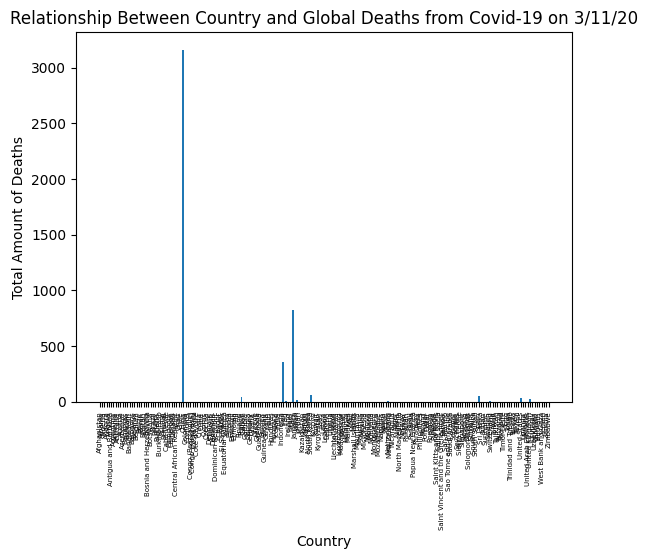

In [20]:
#Country vs. Global Deaths
x = covid_death_df.index
y = covid_death_df["3/11/20"]
plt.bar(x,y)
plt.xlabel("Country")
plt.ylabel("Total Amount of Deaths")
plt.title("Relationship Between Country and Global Deaths from Covid-19 on 3/11/20")
plt.xticks(rotation = 90, fontsize=5)
plt.show()


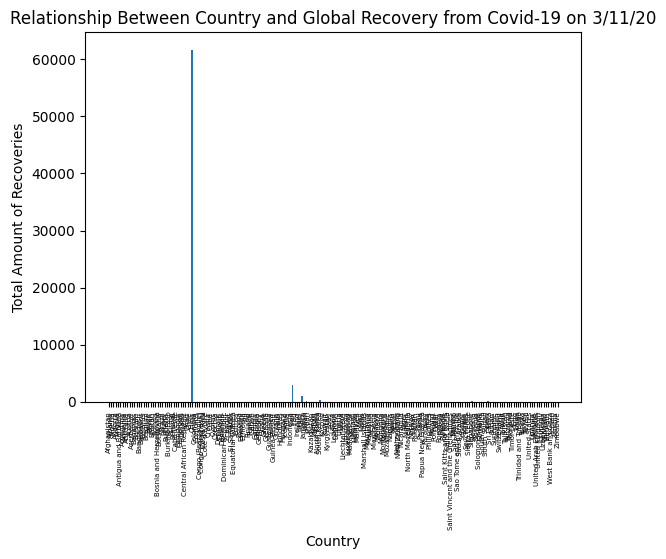

In [21]:
#Date vs. Global Recovery
x = covid_recovery_df.index
y = covid_recovery_df["3/11/20"]
plt.bar(x,y)
plt.xlabel("Country")
plt.ylabel("Total Amount of Recoveries")
plt.title("Relationship Between Country and Global Recovery from Covid-19 on 3/11/20")
plt.xticks(rotation = 90,fontsize=5)
plt.show()

# Income Based Data

In [22]:
print("\n".join(covid_death_df.index))
print("\n".join(covid_recovery_df.index))

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
North Korea
South Korea
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marshall Islan

In [23]:
#Income data is based on World Bank.org 2020 data

In [24]:
income_dict={"Afghanistan": "Low Income", "Albania":"Upper Middle Income","Algeria": "Lower Middle Income","Andorra":"High Income","Angola":"Lower Middle Income","Antigua and Barbuda":"High Income","Argentina":"Upper Middle Income","Armenia":"Upper Middle Income","Australia":"High Income","Austria":"High Income","Azerbaijan":"Upper Middle Income","Bahamas":"High Income","Bahrain":"High Income","Bangladesh":"Lower Middle Income","Barbados":"High Income","Belarus":"Upper Middle Income","Belgium":"High Income","Belize": "Lower Middle Income","Benin": "Lower Middle Income","Bhutan":"Lower Middle Income","Bolivia":"Lower Middle Income","Bosnia and Herzegovina":"Upper Middle Income","Botswana":"Upper Middle Income","Brazil":"Upper Middle Income","Brunei":"High Income","Bulgaria":"Upper Middle Income","Burkina Faso":"Low Income","Burma": "Lower Middle Income","Burundi":"Low Income","Cabo Verde":"Lower Middle Income","Cambodia":"Lower Middle Income","Cameroon":"Lower Middle Income","Canada":"High Income","Central African Republic": "Low Income","Chad":"Low Income","Chile":"High Income","China": "Upper Middle Income","Colombia":"Upper Middle Income","Comoros":"Lower Middle Income","Congo (Brazzaville)":"Lower Middle Income","Congo (Kinshasa)":"Low Income","Costa Rica":"Upper Middle Income","Cote d'Ivoire":"Lower Middle Income","Croatia":"High Income","Cuba":"Upper Middle Income","Cyprus":"High Income","Czechia":"High Income","Denmark":"High Income","Djibouti":"Lower Middle Income","Dominica":"Upper Middle Income","Dominican Republic":"Upper Middle Income","Ecuador":"Upper Middle Income","Egypt":"Lower Middle Income","El Salvador":"Lower Middle Income","Equatorial Guinea":"Upper Middle Income","Eritrea":"Low Income","Estonia":"High Income","Eswatini":"Lower Middle Income","Ethiopia": "Low Income","Fiji":"Upper Middle Income","Finland":"High Income","France":"High Income","Gabon":"Upper Middle Income","Gambia":"Low Income","Georgia":"Upper Middle Income","Germany":"High Income","Ghana":"Lower Middle Income","Greece":"High Income","Grenada":"Upper Middle Income","Guatemala":"Upper Middle Income","Guinea":"Low Income","Guinea-Bissau":"Low Income","Guyana":"Upper Middle Income","Haiti":"Lower Middle Income","Honduras":"Lower Middle Income","Hungary":"High Income","Iceland":"High Income","India":"Lower Middle Income","Indonesia":"Lower Middle Income","Iran":"Lower Middle Income","Iraq":"Upper Middle Income","Ireland":"High Income","Israel":"High Income","Italy":"High Income","Jamaica":"Upper Middle Income","Japan":"High Income","Jordan":"Upper Middle Income","Kazakhstan":"Upper Middle Income","Kenya":"Lower Middle Income","Kiribati":"Lower Middle Income","North Korea":"Low Income","South Korea":"High Income","Kosovo":"Upper Middle Income","Kuwait":"High Income","Kyrgyzstan":"Lower Middle Income","Laos":"Lower Middle Income","Latvia":"High Income","Lebanon":"Upper Middle Income","Lesotho":"Lower Middle Income","Liberia":"Low Income","Libya":"Upper Middle Income","Liechtenstein":"High Income","Lithuania":"High Income","Luxembourg":"High Income","Madagascar":"Low Income","Malawi":"Low Income","Malaysia":"Upper Middle Income","Maldives":"Upper Middle Income","Mali":"Low Income","Malta":"High Income","Marshall Islands":"Upper Middle Income","Mauritania":"Lower Middle Income","Mauritius":"Upper Middle Income","Mexico":"Upper Middle Income","Micronesia":"Lower Middle Income","Moldova":"Upper Middle Income","Monaco":"High Income","Mongolia":"Lower Middle Income","Montenegro":"Upper Middle Income","Morocco":"Lower Middle Income","Mozambique":"Low Income","Namibia":"Upper Middle Income","Nauru":"High Income","Nepal":"Lower Middle Income","Netherlands": "High Income","New Zealand":"High Income","Nicaragua":"Lower Middle Income","Niger":"Low Income","Nigeria":"Lower Middle Income","North Macedonia":"Upper Middle Income","Norway":"High Income","Oman":"High Income","Pakistan":"Lower Middle Income","Palau":"High Income","Panama":"Upper Middle Income","Papua New Guinea":"Lower Middle Income","Paraguay":"Upper Middle Income","Peru":"Upper Middle Income","Philippines":"Lower Middle Income","Poland":"High Income","Portugal":"High Income","Qatar":"High Income","Romania":"Upper Middle Income","Russia":"Upper Middle Income","Rwanda":"Low Income","Saint Kitts and Nevis":"High Income","Saint Lucia":"Upper Middle Income","Saint Vincent and the Grenadines":"Upper Middle Income","Samoa":"Lower Middle Income","San Marino":"High Income","Sao Tome and Principe":"Lower Middle Income","Saudi Arabia":"High Income","Senegal":"Lower Middle Income","Serbia":"Upper Middle Income","Seychelles":"High Income","Sierra Leone":"Low Income","Singapore":"High Income","Slovakia":"High Income","Slovenia":"High Income","Solomon Islands":"Lower Middle Income","Somalia":"Low Income","South Africa":"Upper Middle Income","South Sudan":"Low Income","Spain":"High Income","Sri Lanka":"Lower Middle Income","Sudan":"Low Income","Suriname":"Upper Middle Income","Sweden":"High Income","Switzerland":"High Income","Syria":"Low Income","Taiwan":"High Income","Tajikistan":"Lower Middle Income","Tanzania":"Lower Middle Income","Thailand":"Upper Middle Income","Timor-Leste":"Lower Middle Income","Togo":"Low Income","Tonga":"Upper Middle Income","Trinidad and Tobago":"High Income","Tunisia":"Lower Middle Income","Turkey":"Upper Middle Income","Tuvalu":"Upper Middle Income","United States":"High Income","Uganda":"Low Income","Ukraine":"Lower Middle Income","United Arab Emirates":"High Income","United Kingdom":"High Income","Uruguay":"High Income","Uzbekistan":"Lower Middle Income","Vanuatu":"Lower Middle Income","Vietnam":"Lower Middle Income","West Bank and Gaza":"Lower Middle Income","Yemen":"Low Income","Zambia":"Lower Middle Income","Zimbabwe":"Lower Middle Income"}

In [25]:
covid_death_df["Income"]=covid_death_df.index.map(income_dict)
death_by_income=covid_death_df.groupby("Income").sum().sum(axis=1)
death_by_income

,0
Income,
High Income,190954291
Low Income,2042184
Lower Middle Income,61148574
Upper Middle Income,147975226


In [26]:
covid_recovery_df["Income"]=covid_recovery_df.index.map(income_dict)
recovery_by_income=covid_recovery_df.groupby("Income").sum().sum(axis=1)
recovery_by_income

,0
Income,
High Income,2193143979
Low Income,55045940
Lower Middle Income,2673883692
Upper Middle Income,3849693098


# Covid Income Visualizations

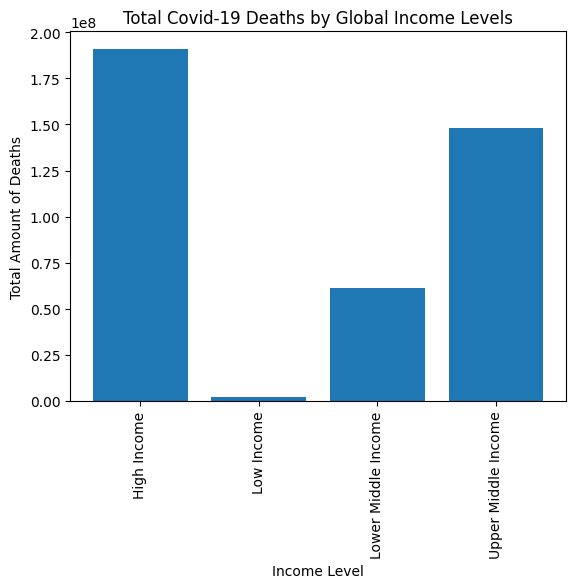

In [27]:
#Income vs Total Death
plt.bar(death_by_income.index, death_by_income.values)
plt.xlabel("Income Level")
plt.ylabel("Total Amount of Deaths")
plt.title("Total Covid-19 Deaths by Global Income Levels")
plt.xticks(rotation=90)
plt.show()

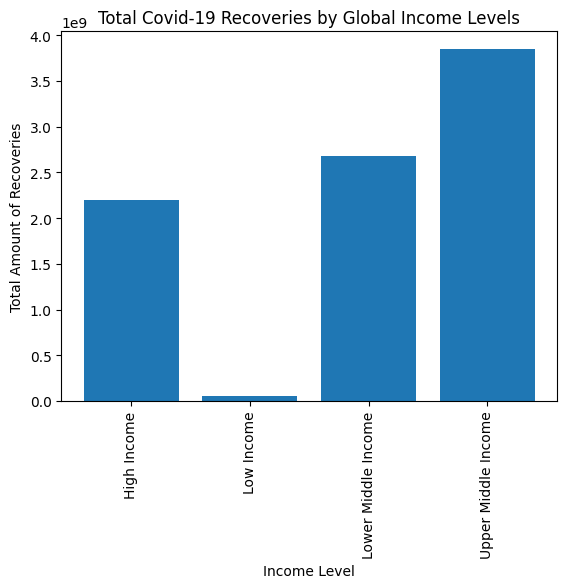

In [28]:
#Income vs Total Recovery
plt.bar(recovery_by_income.index, recovery_by_income.values)
plt.xlabel("Income Level")
plt.ylabel("Total Amount of Recoveries")
plt.title("Total Covid-19 Recoveries by Global Income Levels")
plt.xticks(rotation=90)
plt.show()

In [29]:
#Total sum of Covid-19 deaths per income level
death_by_income

,0
Income,
High Income,190954291
Low Income,2042184
Lower Middle Income,61148574
Upper Middle Income,147975226


In [30]:
#Total sum of Covid-19 recoveries per income level
recovery_by_income

,0
Income,
High Income,2193143979
Low Income,55045940
Lower Middle Income,2673883692
Upper Middle Income,3849693098


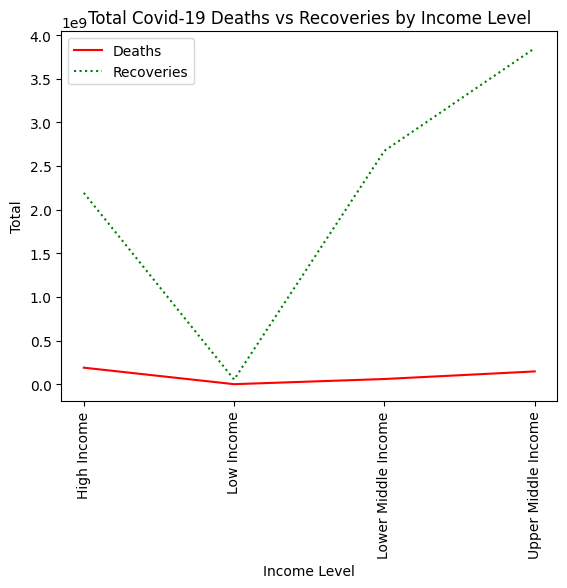

In [31]:
#Combined graph with recoveries and deaths by income level
plt.plot(death_by_income.index, death_by_income.values, color="red", ls="-", label="Deaths")
plt.plot(recovery_by_income.index, recovery_by_income.values, color="green", ls=":", label="Recoveries")
plt.xlabel("Income Level")
plt.ylabel("Total")
plt.title("Total Covid-19 Deaths vs Recoveries by Income Level")
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Grouping Dates By Month

In [32]:
#Making the date columns grouped by month from 3/2020-3/2021
covid_death_df.columns=pd.to_datetime(covid_death_df.columns, errors="coerce")
covid_recovery_df.columns=pd.to_datetime(covid_recovery_df.columns, errors="coerce")
data_death=covid_death_df.loc[:,covid_death_df.columns.notnull()]
data_recovery=covid_recovery_df.loc[:,covid_recovery_df.columns.notnull()]
death_monthly=data_death.groupby(data_death.columns.to_series().dt.to_period("M"), axis=1).sum()
recovery_monthly=data_recovery.groupby(data_recovery.columns.to_series().dt.to_period("M"), axis=1).sum()
#Adding income values for deaths dataset
death_monthly["Income"]=death_monthly.index.map(income_dict)
death_by_income=death_monthly.groupby("Income").sum()
death_by_income=death_by_income.T
death_new_order=["Low Income", "Lower Middle Income", "Upper Middle Income", "High Income"]
death_by_income=death_by_income[death_new_order]
#Adding income values for recovery dataset
recovery_monthly["Income"]=recovery_monthly.index.map(income_dict)
recovery_by_income=recovery_monthly.groupby("Income").sum()
recovery_by_income=recovery_by_income.T
recovery_new_order=["Low Income", "Lower Middle Income", "Upper Middle Income", "High Income"]
recovery_by_income=recovery_by_income[recovery_new_order]

In [33]:
#Adding the "Date" label
recovery_by_income.index.name="Date"
recovery_by_income.columns.name= None

death_by_income.index.name="Date"
death_by_income.columns.name= None

In [34]:
death_by_income.head(13)
recovery_by_income.head(13)

,Low Income,Lower Middle Income,Upper Middle Income,High Income
Date,,,,
2020-03,236,166254,1499004,487284
2020-04,26962,1736455,3879633,10649440
2020-05,176150,5857564,15791035,32248720
2020-06,656173,16815836,45381558,55982112
2020-07,1845976,46176414,105298974,88739060
2020-08,3010382,104189609,191169226,124419060
2020-09,3950747,182126670,268015273,153004407
2020-10,5195498,284908423,350618496,200121773
2020-11,6249542,356706278,421951322,277937979


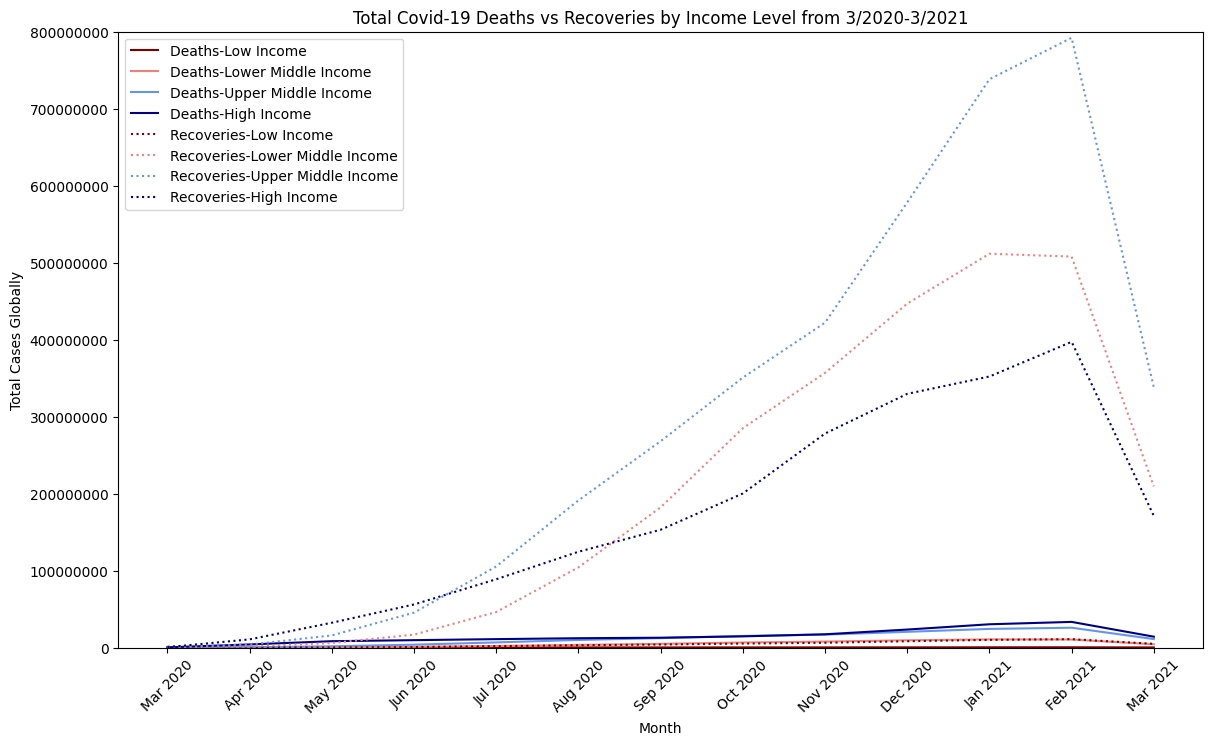

In [35]:
#Visualization for combined graph with income groups and dates
plt.figure(figsize=(14,8))
death_by_income.index= pd.to_datetime(death_by_income.index.astype(str)).strftime("%b %Y")
recovery_by_income.index= pd.to_datetime(recovery_by_income.index.astype(str)).strftime("%b %Y")
plt.plot(death_by_income.index, death_by_income["Low Income"], label="Deaths-Low Income",color="maroon")
plt.plot(death_by_income.index, death_by_income["Lower Middle Income"], label="Deaths-Lower Middle Income",color="lightcoral")
plt.plot(death_by_income.index, death_by_income["Upper Middle Income"], label="Deaths-Upper Middle Income",color="cornflowerblue")
plt.plot(death_by_income.index, death_by_income["High Income"], label="Deaths-High Income",color="navy")

plt.plot(recovery_by_income.index, recovery_by_income["Low Income"], label="Recoveries-Low Income", ls=":",color="maroon")
plt.plot(recovery_by_income.index, recovery_by_income["Lower Middle Income"], label="Recoveries-Lower Middle Income",ls=":",color="lightcoral")
plt.plot(recovery_by_income.index, recovery_by_income["Upper Middle Income"], label="Recoveries-Upper Middle Income",ls=":",color="cornflowerblue")
plt.plot(recovery_by_income.index, recovery_by_income["High Income"], label="Recoveries-High Income",ls=":",color="navy")

plt.xlabel("Month")
plt.ylabel("Total Cases Globally")
plt.title("Total Covid-19 Deaths vs Recoveries by Income Level from 3/2020-3/2021")
plt.legend()
plt.xticks(rotation=45)
plt.ticklabel_format(axis= "y",style="plain")
plt.ylim(0,800000000)
plt.show()

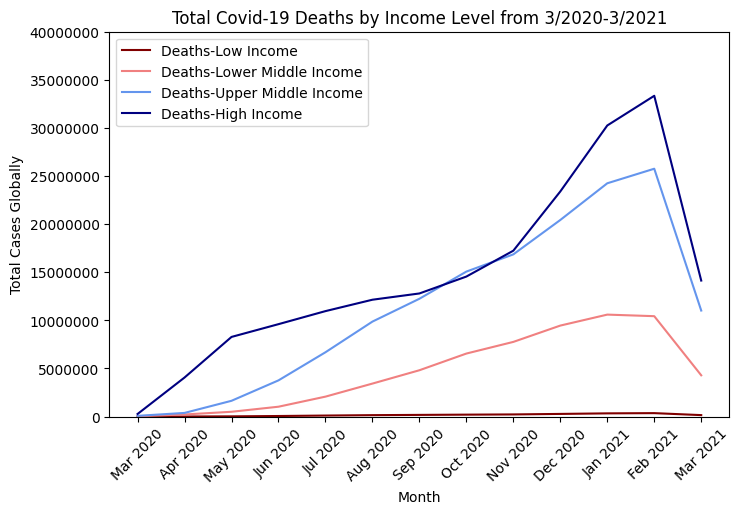

In [36]:
#Visualization for death by income group
plt.figure(figsize=(8,5))
death_by_income.index= pd.to_datetime(death_by_income.index.astype(str)).strftime("%b %Y")

plt.plot(death_by_income.index, death_by_income["Low Income"], label="Deaths-Low Income",color="maroon")
plt.plot(death_by_income.index, death_by_income["Lower Middle Income"], label="Deaths-Lower Middle Income",color="lightcoral")
plt.plot(death_by_income.index, death_by_income["Upper Middle Income"], label="Deaths-Upper Middle Income",color="cornflowerblue")
plt.plot(death_by_income.index, death_by_income["High Income"], label="Deaths-High Income",color="navy")

plt.xlabel("Month")
plt.ylabel("Total Cases Globally")
plt.title("Total Covid-19 Deaths by Income Level from 3/2020-3/2021")
plt.legend()
plt.xticks(rotation=45)
plt.ticklabel_format(axis= "y",style="plain")
plt.ylim(0,40000000)
plt.show()

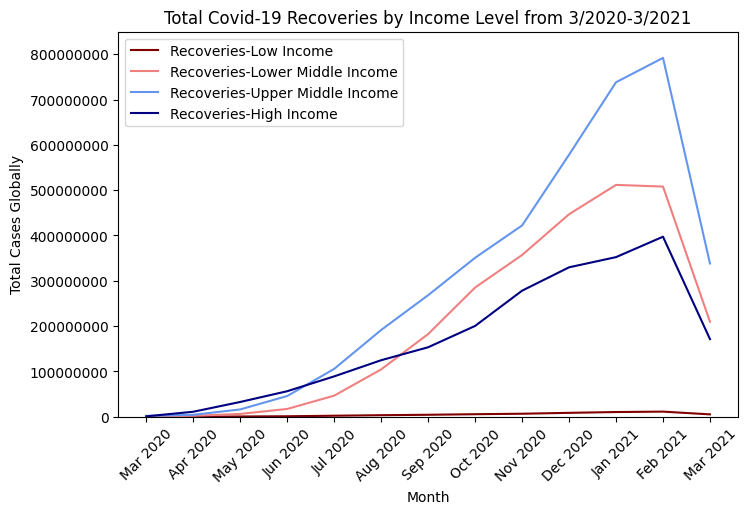

In [37]:
#Visualization for recoveries by income group
plt.figure(figsize=(8,5))
recovery_by_income.index= pd.to_datetime(recovery_by_income.index.astype(str)).strftime("%b %Y")
plt.plot(recovery_by_income.index, recovery_by_income["Low Income"], label="Recoveries-Low Income",color="maroon")
plt.plot(recovery_by_income.index, recovery_by_income["Lower Middle Income"], label="Recoveries-Lower Middle Income",color="lightcoral")
plt.plot(recovery_by_income.index, recovery_by_income["Upper Middle Income"], label="Recoveries-Upper Middle Income",color="cornflowerblue")
plt.plot(recovery_by_income.index, recovery_by_income["High Income"], label="Recoveries-High Income",color="navy")

plt.xlabel("Month")
plt.ylabel("Total Cases Globally")
plt.title("Total Covid-19 Recoveries by Income Level from 3/2020-3/2021")
plt.legend()
plt.xticks(rotation=45)
plt.ticklabel_format(axis= "y",style="plain")
plt.ylim(0,850000000)
plt.show()

# Statistical Analysis

In [38]:
print("Null Hypothesis: There is no significant difference in Covid-19 death/recovery rates between income groups(Low, Lower middle, Upper middle, High)")
print("Alt Hypothesis: There is a significant difference in Covid-19 death/recovery rates between income groups(Low, Lower middle, Upper middle, High)")

#I need to reshape date from wide to long to work for ANOVA testing
death_by_income_long= death_by_income.reset_index().melt(id_vars="Date",var_name="Income Groups", value_name="Total Deaths")
recovery_by_income_long=recovery_by_income.reset_index().melt(id_vars="Date",var_name="Income Groups", value_name="Total Recoveries")

Null Hypothesis: There is no significant difference in Covid-19 death/recovery rates between income groups(Low, Lower middle, Upper middle, High)
Alt Hypothesis: There is a significant difference in Covid-19 death/recovery rates between income groups(Low, Lower middle, Upper middle, High)


In [39]:
#Testing Death Total vs Income
Low_Income=death_by_income["Low Income"].values
Lower_Middle_Income=death_by_income['Lower Middle Income'].values
Upper_Middle_Income=death_by_income["Upper Middle Income"].values
High_Income=death_by_income["High Income"].values

f_statistic, p_value = f_oneway(Low_Income, Lower_Middle_Income, Upper_Middle_Income, High_Income)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

comp=mc.MultiComparison(death_by_income_long["Total Deaths"], death_by_income_long["Income Groups"])
result=comp.tukeyhsd()
result.summary()

F-statistic: 12.168073144058887
P-value: 4.816204306996839e-06


group1,group2,meandiff,p-adj,lower,upper,reject
High Income,Low Income,-14531700.5385,0.0,-21587055.1643,-7476345.9126,True
High Income,Lower Middle Income,-9985055.1538,0.0025,-17040409.7797,-2929700.528,True
High Income,Upper Middle Income,-3306081.9231,0.6005,-10361436.5489,3749272.7028,False
Low Income,Lower Middle Income,4546645.3846,0.3273,-2508709.2412,11602000.0104,False
Low Income,Upper Middle Income,11225618.6154,0.0006,4170263.9896,18280973.2412,True
Lower Middle Income,Upper Middle Income,6678973.2308,0.0695,-376381.3951,13734327.8566,False


In [40]:
#Testing Recovery Total vs Income
Low_Income=recovery_by_income["Low Income"].values
Lower_Middle_Income=recovery_by_income['Lower Middle Income'].values
Upper_Middle_Income=recovery_by_income["Upper Middle Income"].values
High_Income=recovery_by_income["High Income"].values

f_statistic, p_value = f_oneway(Low_Income, Lower_Middle_Income, Upper_Middle_Income, High_Income)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

comp=mc.MultiComparison(recovery_by_income_long["Total Recoveries"], recovery_by_income_long["Income Groups"])
result=comp.tukeyhsd()
result.summary()

F-statistic: 5.846614851856777
P-value: 0.001732908430129124


group1,group2,meandiff,p-adj,lower,upper,reject
High Income,Low Income,-164469079.9231,0.1111,-354377308.7724,25439148.9262,False
High Income,Lower Middle Income,36979977.9231,0.9543,-152928250.9262,226888206.7724,False
High Income,Upper Middle Income,127426855.3077,0.2926,-62481373.5416,317335084.157,False
Low Income,Lower Middle Income,201449057.8462,0.0337,11540828.9969,391357286.6954,True
Low Income,Upper Middle Income,291895935.2308,0.0009,101987706.3815,481804164.08,True
Lower Middle Income,Upper Middle Income,90446877.3846,0.5877,-99461351.4647,280355106.2339,False


# ANOVA Visuals

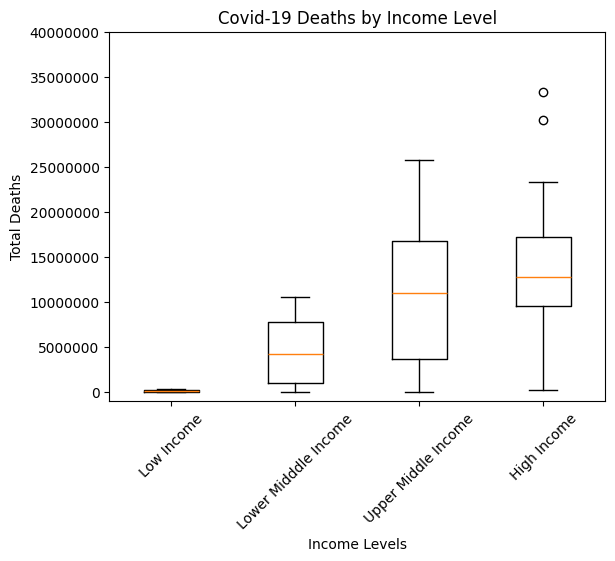

In [41]:
#Visualization (Deaths Box Plot)

Low_Income=death_by_income["Low Income"].values
Lower_Middle_Income=death_by_income['Lower Middle Income'].values
Upper_Middle_Income=death_by_income["Upper Middle Income"].values
High_Income=death_by_income["High Income"].values

plt.boxplot([Low_Income,Lower_Middle_Income,Upper_Middle_Income,High_Income], labels=["Low Income","Lower Midddle Income", "Upper Middle Income", "High Income"])

plt.title("Covid-19 Deaths by Income Level")
plt.xlabel('Income Levels')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.ticklabel_format(axis= "y",style="plain")
plt.ylim(-1000000,40000000)
plt.show()

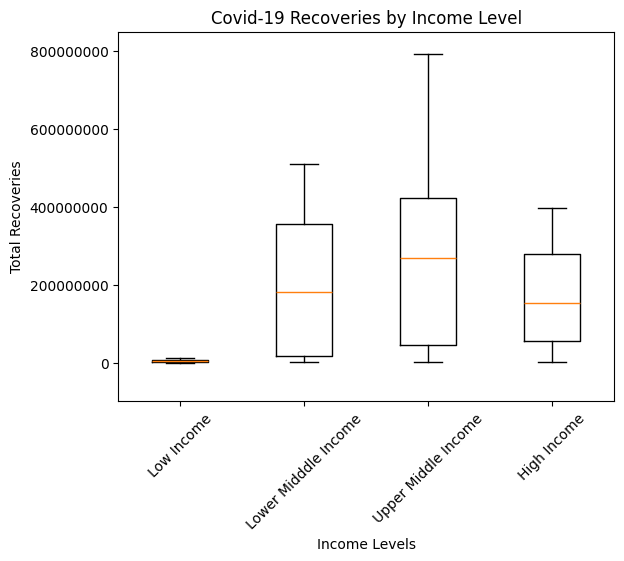

In [42]:
#Visualization (Deaths Box Plot)

Low_Income=recovery_by_income["Low Income"].values
Lower_Middle_Income=recovery_by_income['Lower Middle Income'].values
Upper_Middle_Income=recovery_by_income["Upper Middle Income"].values
High_Income=recovery_by_income["High Income"].values

plt.boxplot([Low_Income,Lower_Middle_Income,Upper_Middle_Income,High_Income], labels=["Low Income","Lower Midddle Income", "Upper Middle Income", "High Income"])

plt.title("Covid-19 Recoveries by Income Level")
plt.xlabel('Income Levels')
plt.ylabel('Total Recoveries')
plt.xticks(rotation=45)
plt.ticklabel_format(axis= "y",style="plain")
plt.ylim(-100000000,850000000)

plt.show()

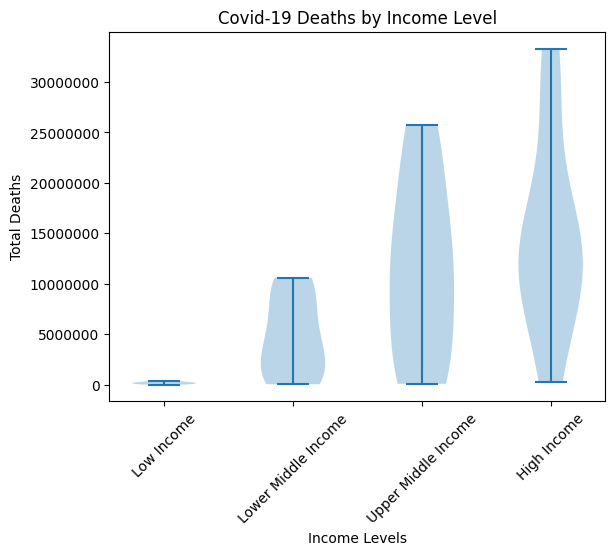

In [43]:
#Visualization (Deaths Violin Plot)
groups=[death_by_income["Low Income"].values,death_by_income['Lower Middle Income'].values,death_by_income["Upper Middle Income"].values,death_by_income["High Income"].values]

plt.violinplot(groups)
plt.title("Covid-19 Deaths by Income Level")
plt.xlabel('Income Levels')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.ticklabel_format(axis= "y",style="plain")
plt.xticks([1, 2, 3,4], ['Low Income', 'Lower Middle Income', 'Upper Middle Income', "High Income"])

plt.show()

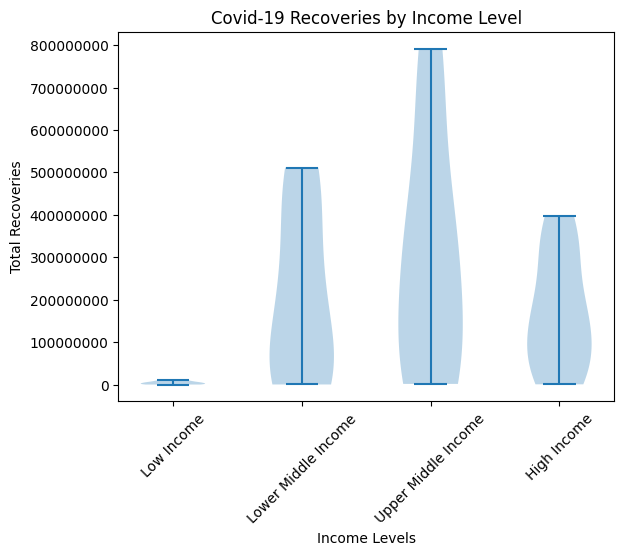

In [44]:
#Visualization (Recoveries Box Plot)
groups=[recovery_by_income["Low Income"].values,recovery_by_income['Lower Middle Income'].values,recovery_by_income["Upper Middle Income"].values,recovery_by_income["High Income"].values]

plt.violinplot(groups)
plt.title("Covid-19 Recoveries by Income Level")
plt.xlabel('Income Levels')
plt.ylabel('Total Recoveries')
plt.xticks(rotation=45)
plt.ticklabel_format(axis= "y",style="plain")
plt.xticks([1, 2, 3,4], ['Low Income', 'Lower Middle Income', 'Upper Middle Income', "High Income"])

plt.show()